In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b0cdfcee6ca709425a64fcaa375ebf89


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | saskylakh
Processing Record 2 of Set 13 | jamestown
Processing Record 3 of Set 13 | bluff
Processing Record 4 of Set 13 | margate
Processing Record 5 of Set 13 | mar del plata
Processing Record 6 of Set 13 | rikitea
Processing Record 7 of Set 13 | yellowknife
Processing Record 8 of Set 13 | chuy
Processing Record 9 of Set 13 | lagoa
Processing Record 10 of Set 13 | barrow
Processing Record 11 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 13 | faya
Processing Record 13 of Set 13 | chernyshevskiy
Processing Record 14 of Set 13 | waipawa
Processing Record 15 of Set 13 | akola
Processing Record 16 of Set 13 | louisbourg
City not found. Skipping...
Processing Record 17 of Set 13 | goderich
Processing Record 18 of Set 13 | dzaoudzi
Processing Record 19 of Set 13 | karkaralinsk
City not found. Skipping...
Processing Record 20 of Set 13 | sechura
Processing Record 21 

Processing Record 31 of Set 16 | batticaloa
Processing Record 32 of Set 16 | avera
Processing Record 33 of Set 16 | oga
Processing Record 34 of Set 16 | jardim
Processing Record 35 of Set 16 | pangai
Processing Record 36 of Set 16 | mayo
Processing Record 37 of Set 16 | maragogi
Processing Record 38 of Set 16 | pallasovka
Processing Record 39 of Set 16 | zhigansk
Processing Record 40 of Set 16 | grand river south east
City not found. Skipping...
Processing Record 41 of Set 16 | mangrol
Processing Record 42 of Set 16 | lasa
Processing Record 43 of Set 16 | mittagong
Processing Record 44 of Set 16 | fortuna
Processing Record 45 of Set 16 | mirnyy
Processing Record 46 of Set 16 | hami
Processing Record 47 of Set 16 | bandarban
Processing Record 48 of Set 16 | san patricio
Processing Record 49 of Set 16 | skjervoy
Processing Record 50 of Set 16 | port blair
Processing Record 1 of Set 17 | verkhoyansk
Processing Record 2 of Set 17 | road town
Processing Record 3 of Set 17 | tommot
Processin

Processing Record 16 of Set 20 | the valley
Processing Record 17 of Set 20 | meyungs
City not found. Skipping...
Processing Record 18 of Set 20 | poum
Processing Record 19 of Set 20 | pangnirtung
Processing Record 20 of Set 20 | dandong
Processing Record 21 of Set 20 | toulepleu
City not found. Skipping...
Processing Record 22 of Set 20 | la grande
Processing Record 23 of Set 20 | seymchan
Processing Record 24 of Set 20 | waw
Processing Record 25 of Set 20 | cam ranh
Processing Record 26 of Set 20 | sola
Processing Record 27 of Set 20 | berdigestyakh
Processing Record 28 of Set 20 | mantua
Processing Record 29 of Set 20 | nantucket
Processing Record 30 of Set 20 | ahipara
Processing Record 31 of Set 20 | marsh harbour
Processing Record 32 of Set 20 | petropavlovsk-kamchatskiy
Processing Record 33 of Set 20 | satitoa
City not found. Skipping...
Processing Record 34 of Set 20 | beringovskiy
Processing Record 35 of Set 20 | saint-joseph
Processing Record 36 of Set 20 | lompoc
Processing R

Processing Record 1 of Set 24 | harper
Processing Record 2 of Set 24 | perth
Processing Record 3 of Set 24 | general pico
Processing Record 4 of Set 24 | eyl
Processing Record 5 of Set 24 | guerrero negro
Processing Record 6 of Set 24 | banmo
City not found. Skipping...
Processing Record 7 of Set 24 | mehamn
Processing Record 8 of Set 24 | merauke
Processing Record 9 of Set 24 | kloulklubed
Processing Record 10 of Set 24 | manakara
Processing Record 11 of Set 24 | salisbury
Processing Record 12 of Set 24 | egvekinot
Processing Record 13 of Set 24 | nargana
Processing Record 14 of Set 24 | roald
Processing Record 15 of Set 24 | kazalinsk
City not found. Skipping...
Processing Record 16 of Set 24 | sabla
Processing Record 17 of Set 24 | ozark
Processing Record 18 of Set 24 | severo-kurilsk
Processing Record 19 of Set 24 | viedma
Processing Record 20 of Set 24 | inongo
Processing Record 21 of Set 24 | manggar
Processing Record 22 of Set 24 | yershov
Processing Record 23 of Set 24 | sataua

In [14]:
len(city_data)

563

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.92,114.08,-26.25,84,55,10.13,RU,2020-12-31 03:42:02
1,Jamestown,42.10,-79.24,37.00,93,90,17.22,US,2020-12-31 03:42:02
2,Bluff,-46.60,168.33,57.94,82,95,8.34,NZ,2020-12-31 03:42:02
3,Margate,51.38,1.39,36.00,83,65,1.99,GB,2020-12-31 03:42:03
4,Mar Del Plata,-38.00,-57.56,59.00,71,20,8.05,AR,2020-12-31 03:42:03
5,Rikitea,-23.12,-134.97,78.21,75,1,12.30,PF,2020-12-31 03:42:03
6,Yellowknife,62.46,-114.35,0.00,84,75,11.41,CA,2020-12-31 03:42:03
7,Chuy,-33.70,-53.46,65.77,93,63,4.74,UY,2020-12-31 03:42:04
8,Lagoa,39.05,-27.98,58.39,72,85,16.08,PT,2020-12-31 03:42:04
9,Barrow,71.29,-156.79,-16.60,68,1,16.11,US,2020-12-31 03:42:04


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [17]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2020-12-31 03:42:02,71.92,114.08,-26.25,84,55,10.13
1,Jamestown,US,2020-12-31 03:42:02,42.10,-79.24,37.00,93,90,17.22
2,Bluff,NZ,2020-12-31 03:42:02,-46.60,168.33,57.94,82,95,8.34
3,Margate,GB,2020-12-31 03:42:03,51.38,1.39,36.00,83,65,1.99
4,Mar Del Plata,AR,2020-12-31 03:42:03,-38.00,-57.56,59.00,71,20,8.05


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

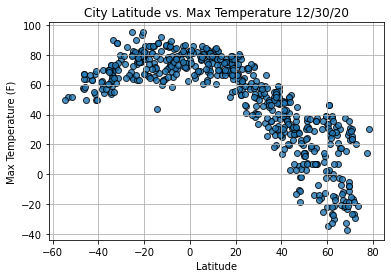

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

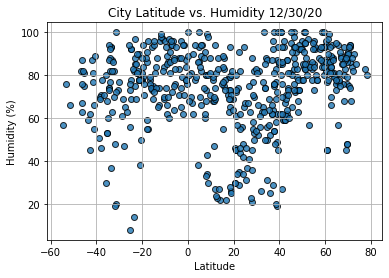

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

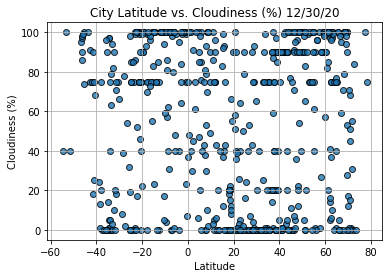

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

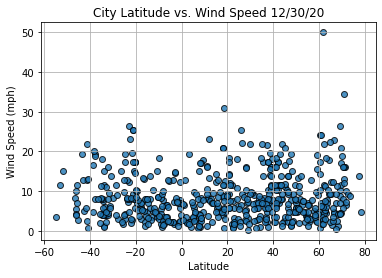

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
index13 = city_data_df.loc[13]
index13

City                        Akola
Country                        IN
Date          2020-12-31 03:42:05
Lat                         20.73
Lng                            77
Max Temp                    71.55
Humidity                       46
Cloudiness                    100
Wind Speed                   9.28
Name: 13, dtype: object

In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

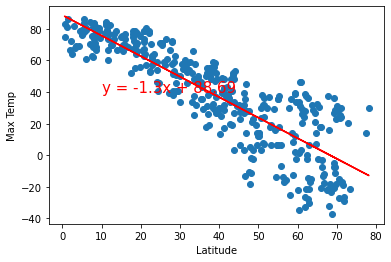

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

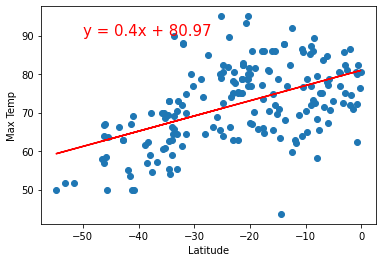

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

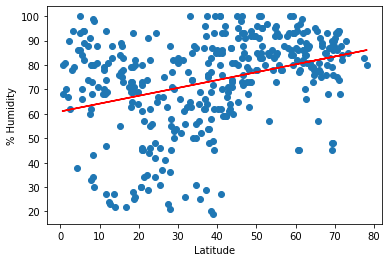

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

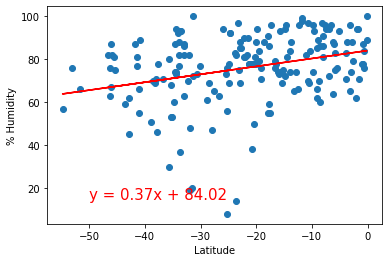

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

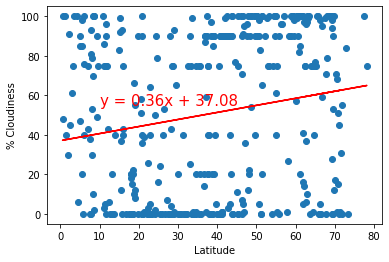

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

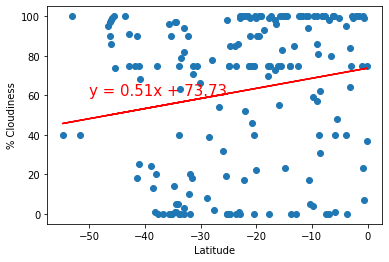

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

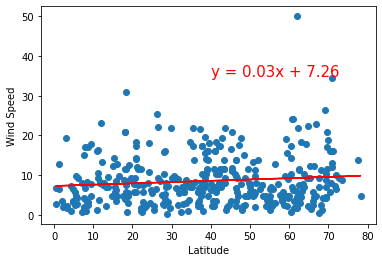

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

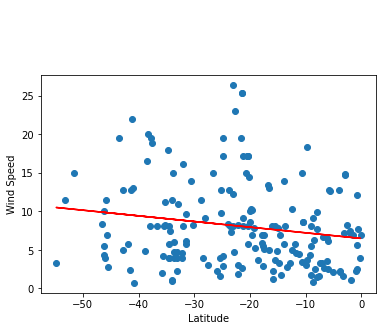

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))